In [25]:
import heapq as hp
import random
import matplotlib.pyplot as plt

In [26]:
def sim(collect_rate=0.96, num_per_day=2, dur_easy=90, dur_norm=7, day_last=356//2):
    easy_bonus = 1.3  # 簡単と回答した時のボーナス
    wrong_penalty = 0.2  # 間違えた時のペナルティ よくわからない・・・
    collect_rate_first = 0.4  # 最初の正答率
    # dur_norm = 7*2  # 復習開始までの間隔
    # day_last = 356//2  # 何日間やるか
    base_rate = 2.5

    que = []
    ans = 0
    # 初日
    day = 0

    new_ans_cnt = [0] * (day_last)  # 新しい正解数の推移

    for day in range(day_last):
        for _ in range(num_per_day):
            if que and que[0][0] <= day:
                # 期日を過ぎている場合は、復習開始
                pre_day, pre_dur, pre_rate = hp.heappop(que)
                if random.random() >= collect_rate:
                    # 不正解だった場合
                    cur_day = day + 1  # 翌日にやる
                    cur_dur = dur_norm
                    cur_rate = pre_rate - wrong_penalty
                    cur_rate = max(cur_rate, 1.3)
                    hp.heappush(que, (cur_day, cur_dur, cur_rate))
                else:
                    # 正解だった場合
                    cur_dur = pre_dur * base_rate * easy_bonus
                    cur_day = day + cur_dur
                    cur_rate = pre_rate * easy_bonus
                    hp.heappush(que, (cur_day, cur_dur, cur_rate))
            else:
                # 期日を迎えたカードがない
                ans += 1
                new_ans_cnt[day] += 1
                if random.random() >= collect_rate_first:
                    hp.heappush(que, (day+dur_norm, dur_norm, base_rate))
                else:
                    hp.heappush(que, (day+dur_easy, dur_easy, base_rate*easy_bonus))

    """
    一日当たりの新たに解けた問題数、新たに溶けた問題数の推移
    """
    return ans/day_last, new_ans_cnt


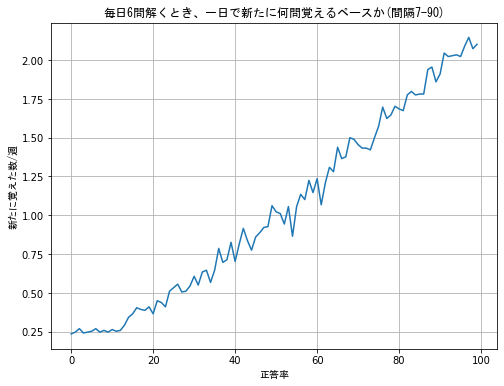

復習の正答率が90%前後あれば、十分な学習効果を期待できる
初見で間違えた問題は14日後に復習、解けた問題は90日後に復習する
学習期間は半年とする
なお、初見の問題の正答率は、合格点に足りない40%としている


In [27]:
dat = [[0]*2 for _ in range(100)]
for r in range(100):
    dat[r][0] = r
    dat[r][1], _ = sim(r/100, num_per_day=6, dur_norm=7)

xdata = [i[0] for i in dat]
ydata = [i[1] for i in dat]
plt.figure(figsize=(8, 6))
plt.title('毎日6問解くとき、一日で新たに何問覚えるペースか(間隔7-90)', fontname="MS Gothic")
plt.grid(True)
plt.xlabel('正答率', fontname="MS Gothic")
plt.ylabel('新たに覚えた数/週', fontname="MS Gothic")
plt.plot(xdata, ydata)
plt.show()
print('復習の正答率が90%前後あれば、十分な学習効果を期待できる')
print('初見で間違えた問題は14日後に復習、解けた問題は90日後に復習する')
print('学習期間は半年とする')
print('なお、初見の問題の正答率は、合格点に足りない40%としている')

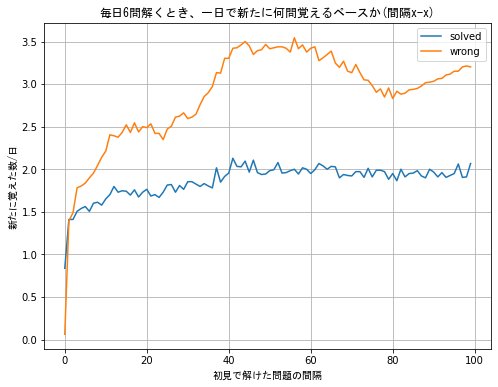

復習間隔を長くしたとしても、学習効果は頭打ちとなる
初見で解けた問題は7日、解けなかった問題は30日以上で十分と思われる
ただし、間隔が長いほど前半に学習を集中させることができるため、7日-90日程度の間隔が良いと思われる


In [28]:
dat = [[0]*2 for _ in range(100)]
for r in range(100):
    dat[r][0] = r
    dat[r][1], _ = sim(90/100, num_per_day=6, dur_easy=r)

dat2 = [[0]*2 for _ in range(100)]
for r in range(100):
    dat2[r][0] = r
    dat2[r][1], _ = sim(90/100, num_per_day=6, dur_norm=r)
# print(dat)

xdata = [i[0] for i in dat]
ydata = [i[1] for i in dat]
ydata2 = [i[1] for i in dat2]
plt.figure(figsize=(8, 6))
plt.title('毎日6問解くとき、一日で新たに何問覚えるペースか(間隔x-x)', fontname="MS Gothic")
plt.grid(True)
plt.xlabel('初見で解けた問題の間隔', fontname="MS Gothic")
plt.ylabel('新たに覚えた数/日', fontname="MS Gothic")
plt.plot(xdata, ydata, label='solved')
plt.plot(xdata, ydata2, label='wrong')
plt.legend()
plt.show()
print('復習間隔を長くしたとしても、学習効果は頭打ちとなる')
print('初見で解けた問題は7日、解けなかった問題は30日以上で十分と思われる')
print('ただし、間隔が長いほど前半に学習を集中させることができるため、7日-90日程度の間隔が良いと思われる')

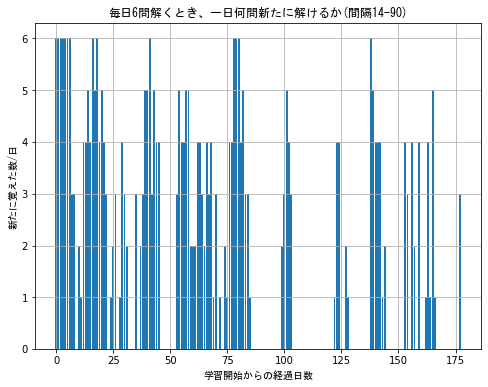

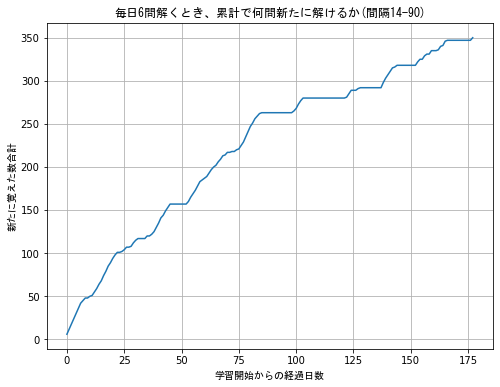

初見で解けた問題の間隔を7日、解けなかった問題の間隔を90日として、およそ90日で250問を新たに解ける
1科目受験であれば、過去問16年分相当。
3科目受験であれば、過去問5年分相当。


In [29]:
_, new_ans_cnt = sim(90/100, num_per_day=6, dur_norm=7, dur_easy=90)
dat = []
for i, cnt in enumerate(new_ans_cnt):
    dat.append((i, cnt))


xdata = [i[0] for i in dat]
ydata = [i[1] for i in dat]
ydata2 = ydata[:]
for i in range(1, len(ydata2)):
    ydata2[i] += ydata2[i-1]
plt.figure(figsize=(8, 6))
plt.title('毎日6問解くとき、一日何問新たに解けるか(間隔14-90)', fontname="MS Gothic")
plt.grid(True)
plt.xlabel('学習開始からの経過日数', fontname="MS Gothic")
plt.ylabel('新たに覚えた数/日', fontname="MS Gothic")
plt.bar(xdata, ydata, label='new answer')
plt.show()
plt.figure(figsize=(8, 6))
plt.title('毎日6問解くとき、累計で何問新たに解けるか(間隔14-90)', fontname="MS Gothic")
plt.grid(True)
plt.xlabel('学習開始からの経過日数', fontname="MS Gothic")
plt.ylabel('新たに覚えた数合計', fontname="MS Gothic")
plt.plot(xdata, ydata2, label='new answer sum')
plt.show()
print('初見で解けた問題の間隔を7日、解けなかった問題の間隔を90日として、およそ90日で250問を新たに解ける')
print('1科目受験であれば、過去問16年分相当。')
print('3科目受験であれば、過去問5年分相当。')

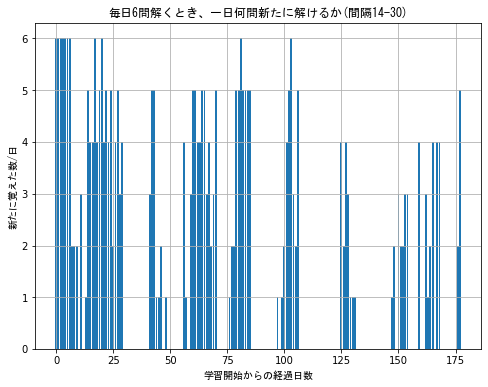

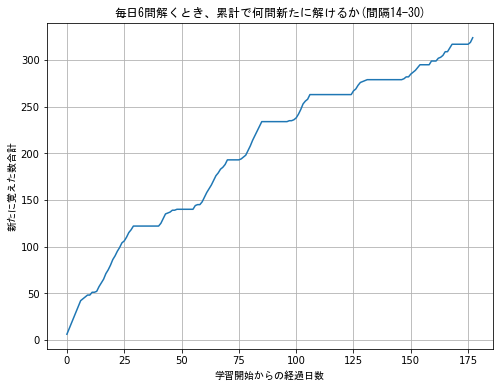

初見で解けた問題の間隔を7日、解けなかった問題の間隔を30日として、およそ90日で200問を新たに解ける
30日～50日の間に復習しかできない停滞期が発生し、小テストの進捗に悪影響を及ぼす恐れがある


In [30]:
_, new_ans_cnt = sim(90/100, num_per_day=6, dur_norm=7, dur_easy=30)
dat = []
for i, cnt in enumerate(new_ans_cnt):
    dat.append((i, cnt))


xdata = [i[0] for i in dat]
ydata = [i[1] for i in dat]
ydata2 = ydata[:]
for i in range(1, len(ydata2)):
    ydata2[i] += ydata2[i-1]
plt.figure(figsize=(8, 6))
plt.title('毎日6問解くとき、一日何問新たに解けるか(間隔14-30)', fontname="MS Gothic")
plt.grid(True)
plt.xlabel('学習開始からの経過日数', fontname="MS Gothic")
plt.ylabel('新たに覚えた数/日', fontname="MS Gothic")
plt.bar(xdata, ydata, label='new answer')
plt.show()
plt.figure(figsize=(8, 6))
plt.title('毎日6問解くとき、累計で何問新たに解けるか(間隔14-30)', fontname="MS Gothic")
plt.grid(True)
plt.xlabel('学習開始からの経過日数', fontname="MS Gothic")
plt.ylabel('新たに覚えた数合計', fontname="MS Gothic")
plt.plot(xdata, ydata2, label='new answer sum')
plt.show()
print('初見で解けた問題の間隔を7日、解けなかった問題の間隔を30日として、およそ90日で200問を新たに解ける')
print('30日～50日の間に復習しかできない停滞期が発生し、小テストの進捗に悪影響を及ぼす恐れがある')

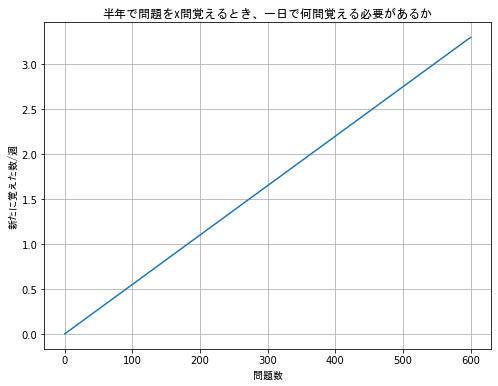

毎日6問解くと、一日あたり2問のペースで新たに覚えることができ、年間で350問=23年分相当を暗記できる
つまり、23年分の過去問で、平均で90点を獲得できる状態になる
仮に3科目同時並行であったとしても、過去問7年分に対応できる


In [31]:
# 新たに覚えた数/週がいくつ必要か
xdata = [i for i in range(601)]
ydata = [i/(365//2) for i in range(601)]
plt.figure(figsize=(8, 6))
plt.title('半年で問題をx問覚えるとき、一日で何問覚える必要があるか', fontname="MS Gothic")
plt.grid(True)
plt.xlabel('問題数', fontname="MS Gothic")
plt.ylabel('新たに覚えた数/週', fontname="MS Gothic")
plt.plot(xdata, ydata)
plt.show()
print('毎日6問解くと、一日あたり2問のペースで新たに覚えることができ、年間で350問=23年分相当を暗記できる')
print('つまり、23年分の過去問で、平均で90点を獲得できる状態になる')
print('仮に3科目同時並行であったとしても、過去問7年分に対応できる')

実際のペースとしては、新しい問題を平均して1日約2問ずつ解けばよいので、
* 平日は新しい問題を1問、復習を5問
* 休日は新しい問題を5問、復習を1問
程度の学習量となろう。
